## **Used Cars Price Prediction**

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

### **Let us load the data**

In [2]:
data = pd.read_csv("used_cars.csv")

### **Understand the data by observing a few rows**

In [3]:
data.head()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,New_price
0,Maruti Wagon R LXI CNG,Mumbai,CNG,Manual,First,2010,72000,26.60,998,58,5,1.75,22.78
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First,2015,41000,19.67,1582,126,5,12.50,22.78
2,Honda Jazz V,Chennai,Petrol,Manual,First,2011,46000,18.20,1199,89,5,4.50,8.61
3,Maruti Ertiga VDI,Chennai,Diesel,Manual,First,2012,87000,20.77,1248,89,7,6.00,22.78
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second,2013,40670,15.20,1968,141,5,17.74,22.78


In [4]:
data.tail()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,New_price
7166,Volkswagen Vento Diesel Trendline,Hyderabad,Diesel,Manual,First,2011,89411,20.54,1598,104,5,5.65,22.78
7167,Volkswagen Polo GT TSI,Mumbai,Petrol,Automatic,First,2015,59000,17.21,1197,104,5,5.65,22.78
7168,Nissan Micra Diesel XV,Kolkata,Diesel,Manual,First,2012,28000,23.08,1461,63,5,5.65,22.78
7169,Volkswagen Polo GT TSI,Pune,Petrol,Automatic,Third,2013,52262,17.20,1197,104,5,5.65,22.78
7170,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,Diesel,Automatic,First,2014,72443,10.00,2148,170,5,5.65,22.78


**Observations and Insights:**<br>
-The first five cars are between 40670 and 87000 km. Three diesels, one petrol, and a CNG fuel type. Four manual and one automatic transmission. The mileage ranges between 15.20 and 26.60, engine is between 998.0 and 1968.0CC with power outputs between 58.16 and 140.8 bhp. Four cars have 5 seats, with one having 7 seats. The prices are set between 1.75 and 17.74.<br>
-The last five cars are ranged between 28,000 and 89,411 km. Three diesel and two petrol, three automatic and two manual transmission. The mileage ranges between 10.00 and 23.08. The engine is between 1197.0 and 2148.0 cc, with the power outputs between 63.1 and 170.o bhp. All five have 5 seats, with no prices. 

### **Let us check the data types and and missing values of each column** 

In [5]:
# Check the datatypes of each column. Hint: Use info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7171 entries, 0 to 7170
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7171 non-null   object 
 1   Location           7171 non-null   object 
 2   Fuel_Type          7171 non-null   object 
 3   Transmission       7171 non-null   object 
 4   Owner_Type         7171 non-null   object 
 5   Year               7171 non-null   int64  
 6   Kilometers_Driven  7171 non-null   int64  
 7   Mileage            7171 non-null   float64
 8   Engine             7171 non-null   int64  
 9   Power              7171 non-null   int64  
 10  Seats              7171 non-null   int64  
 11  Price              7171 non-null   float64
 12  New_price          7171 non-null   float64
dtypes: float64(3), int64(5), object(5)
memory usage: 728.4+ KB


In [6]:
# Check total number of missing values of each column. Hint: Use isnull() method

data.isnull()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,New_price
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7166,False,False,False,False,False,False,False,False,False,False,False,False,False
7167,False,False,False,False,False,False,False,False,False,False,False,False,False
7168,False,False,False,False,False,False,False,False,False,False,False,False,False
7169,False,False,False,False,False,False,False,False,False,False,False,False,False


**Observations and Insights:**<br>
-The average kilometers driven is 57667.52 km with a standard dev of 18.34 km.<br>
-The average mileage on each car is 18.34 with a standard deviation of 4.15.<br>
-The average engine has 1615.46 cc with a standard deviation of 591.23.<br>
-The average power of each automobile is 112.69 bhp with a standard devition of 52.93.<br>
-The average amount of seats is 5.28 with a standard deviation of 0.80. <br>
-The average new price is 22.76 with a standard deviation of 10.37. <br>
-The average price is 8.80 with a standard deviation of 10.23.

## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [7]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,New_price
count,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000
mean,2013.409985,57667.522242,18.346801,1615.467996,112.687910,5.280575,8.801666,22.764769
std,3.206615,37416.263860,4.157527,591.226844,52.927415,0.807175,10.225216,10.372828
min,1996.000000,171.000000,6.400000,72.000000,34.000000,2.000000,0.440000,3.910000
25%,2012.000000,34000.000000,15.300000,1198.000000,77.000000,5.000000,3.900000,22.780000
50%,2014.000000,53138.000000,18.200000,1493.000000,99.000000,5.000000,5.650000,22.780000
75%,2016.000000,73000.000000,21.100000,1968.000000,138.000000,5.000000,8.400000,22.780000
max,2019.000000,775000.000000,33.540000,5998.000000,616.000000,10.000000,160.000000,375.000000


### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [8]:
# Explore basic summary statistics of categorical variables. Hint: Use the argument include = ['object']
data.describe(include = ['object'])

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,7171,7171,7171,7171,7171
unique,2006,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,55,943,3820,5151,5898


**Number of unique observations in each category**

In [9]:
cat_cols = data.select_dtypes(include = ['object']).columns

for column in cat_cols:
    
    print("For column:", column)
    
    print(data[column].unique)
    
    print('-'*50)

For column: Name
<bound method Series.unique of 0                                  Maruti Wagon R LXI CNG
1                        Hyundai Creta 1.6 CRDi SX Option
2                                            Honda Jazz V
3                                       Maruti Ertiga VDI
4                         Audi A4 New 2.0 TDI Multitronic
                              ...                        
7166                    Volkswagen Vento Diesel Trendline
7167                               Volkswagen Polo GT TSI
7168                               Nissan Micra Diesel XV
7169                               Volkswagen Polo GT TSI
7170    Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...
Name: Name, Length: 7171, dtype: object>
--------------------------------------------------
For column: Location
<bound method Series.unique of 0           Mumbai
1             Pune
2          Chennai
3          Chennai
4       Coimbatore
           ...    
7166     Hyderabad
7167        Mumbai
7168       Kolkata

**Let's explore the two points mentioned above**

**Check Kilometers_Driven extreme values**

In [10]:
# Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values("Kilometers_Driven", ascending = False).head(10)

,Name,Location,Fuel_Type,Transmission,Owner_Type,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,New_price
333,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,Diesel,Automatic,First,2013,775000,19.30,1968,141,5,7.50,22.78
1832,Volkswagen Vento Diesel Highline,Chennai,Diesel,Manual,First,2013,720000,20.54,1598,104,5,5.90,22.78
351,Hyundai i10 Magna 1.2,Chennai,Petrol,Manual,First,2009,620000,20.36,1197,79,5,2.70,22.78
3050,Honda City i VTEC SV,Kolkata,Petrol,Manual,First,2015,480000,17.40,1497,117,5,5.00,22.78
2785,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,Diesel,Automatic,First,2015,480000,16.96,1968,138,5,13.00,22.78
4438,Hyundai i20 Magna Optional 1.2,Bangalore,Petrol,Manual,First,2013,445000,18.50,1197,83,5,4.45,22.78
6841,Maruti Swift Dzire Tour LDI,Jaipur,Diesel,Manual,First,2012,350000,23.40,1248,74,5,5.65,22.78
3600,Tata Indigo LS,Jaipur,Diesel,Manual,First,2008,300000,17.00,1405,70,5,1.00,22.78
1502,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,Diesel,Manual,First,2005,299322,12.80,2494,102,8,4.00,22.78
6839,ISUZU D-MAX V-Cross 4X4,Jaipur,Diesel,Manual,First,2017,290000,12.40,2499,134,5,5.65,22.78


## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [11]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize = (15, 10), bins = None):
    
    """ Boxplot and histogram combined
    
    feature: 1-d feature array
    
    figsize: size of fig (default (9, 8))
    
    bins: number of bins (default None / auto)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid = 2
                                           sharex = True, # X-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # Creating the 2 subplots
    
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color = 'violet') # Boxplot will be created and a symbol will indicate the mean value of the column
    
    sns.distplot(feature, kde = F, ax = ax_hist2, bins = bins, palette = "winter") if bins else sns.distplot(feature, kde = False, ax = ax_hist2) # For histogram
    
    ax_hist2.axvline(np.mean(feature), color = 'green', linestyle = '--') # Add mean to the histogram
    
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram

**Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.**

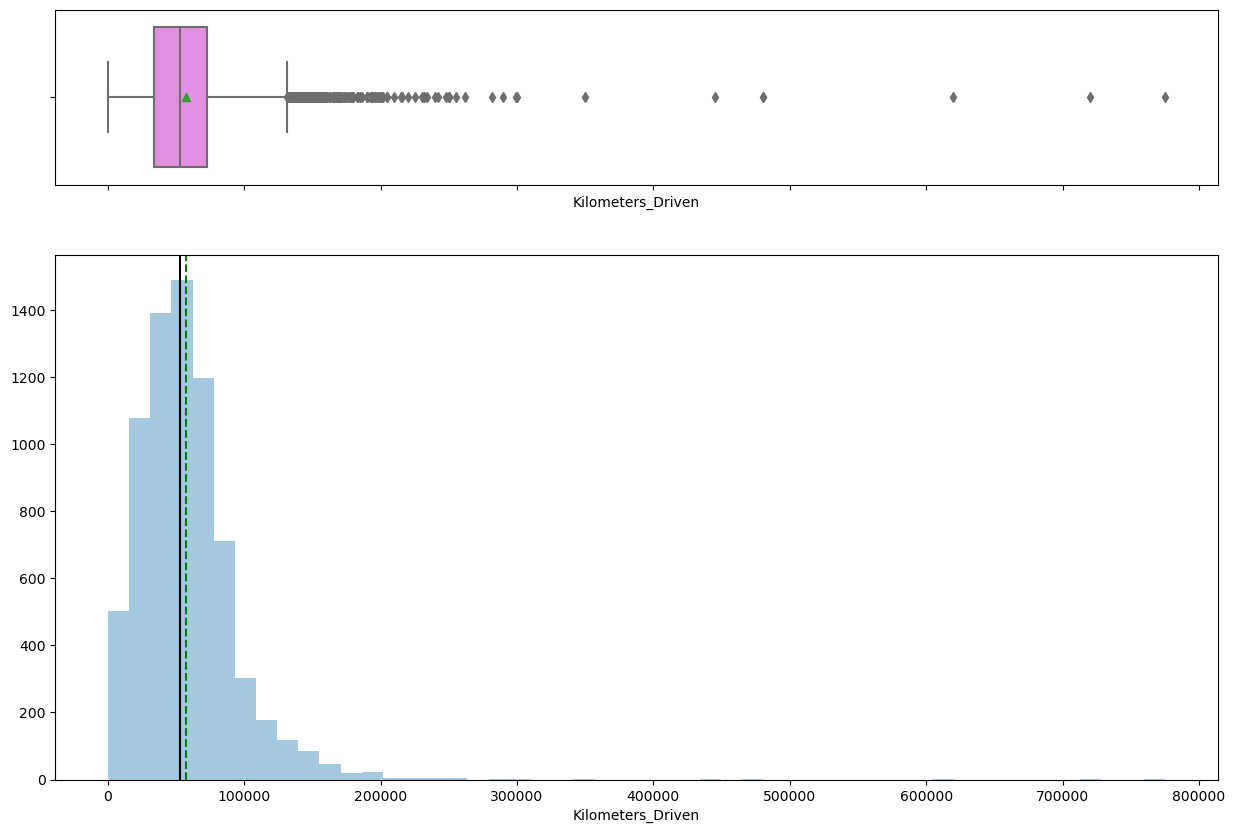

In [12]:
# Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data['Kilometers_Driven'])

**Think About It**: Kilometers_Driven is highly right-skewed. Can we use Log transformation of the feature to reduce/remove the skewness? Why can't we keep skewed data?

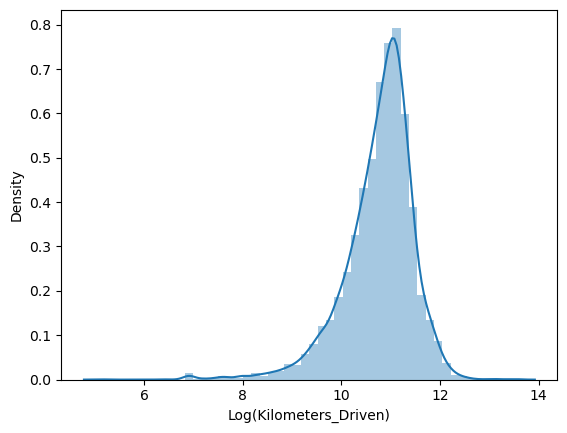

In [13]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

**Think About It**: Kilometers_Driven is highly right-skewed. Can we use Log transformation of the feature to reduce/remove the skewness? Why can't we keep skewed data?<br>
     -Skewed data will cause the new pricing model to be skewed/incorrect.

In [15]:
# We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as **'price_log'**.

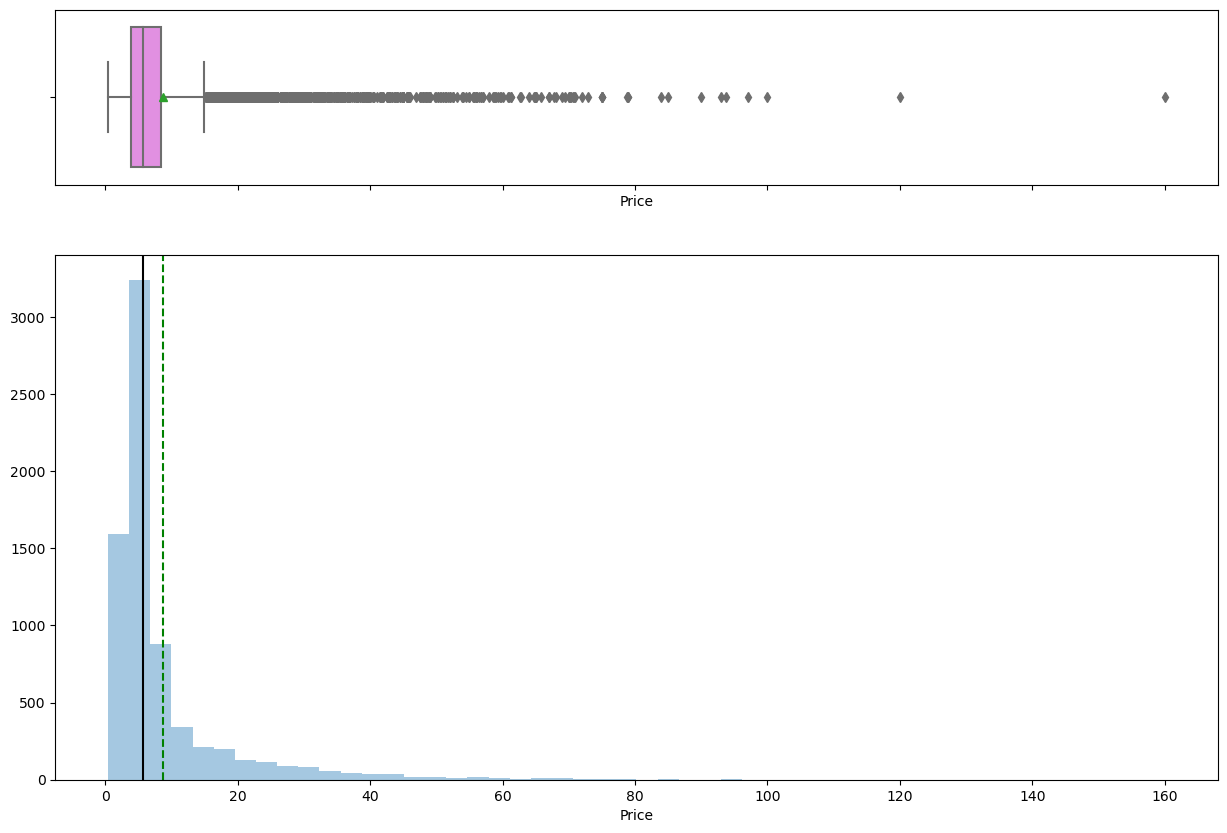

In [16]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(data['Price'])

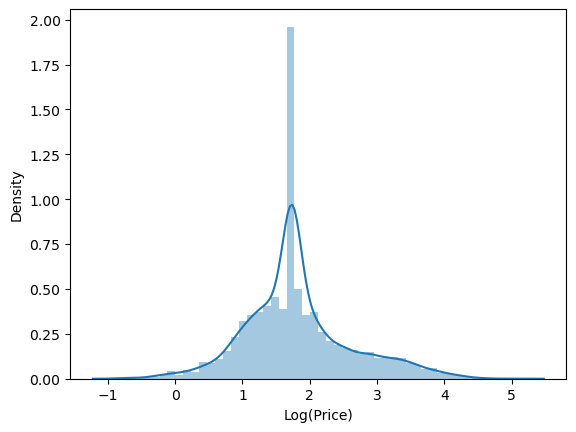

In [17]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(data["Price"]), axlabel = "Log(Price)");

In [18]:
# We can Add a transformed Price feature in data
data["Price_log"] = np.log(data["Price"])

**Note:** Try plotting histogram and box-plot for different numerical features and understand how the data looks like.

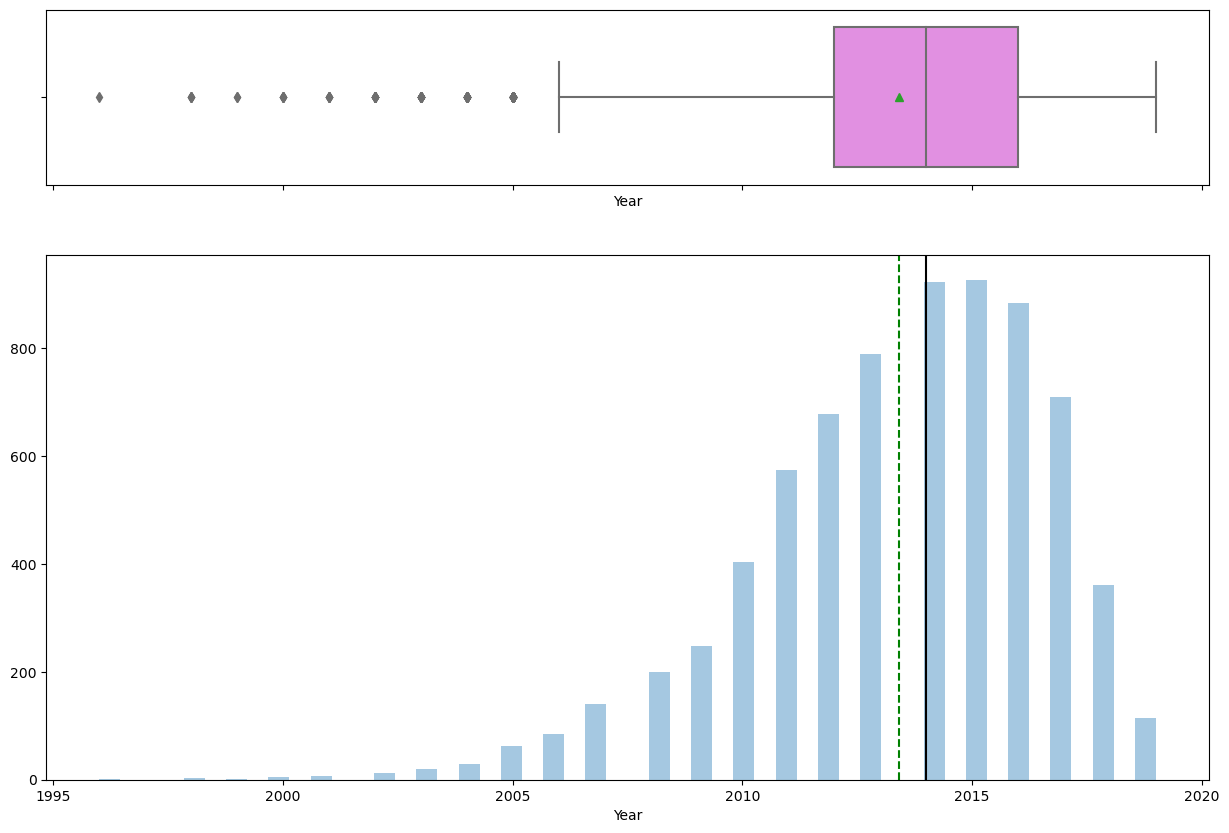

In [19]:
histogram_boxplot(data['Year'])

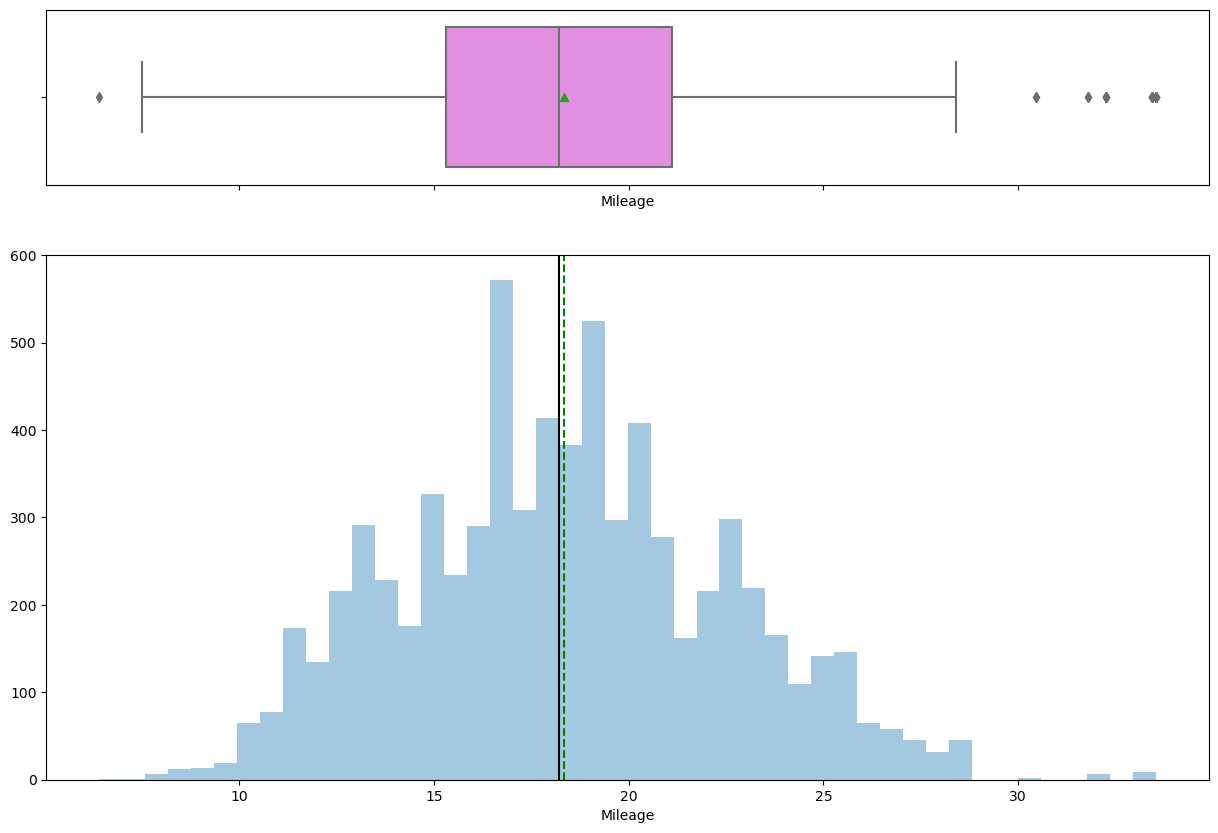

In [20]:
histogram_boxplot(data['Mileage'])

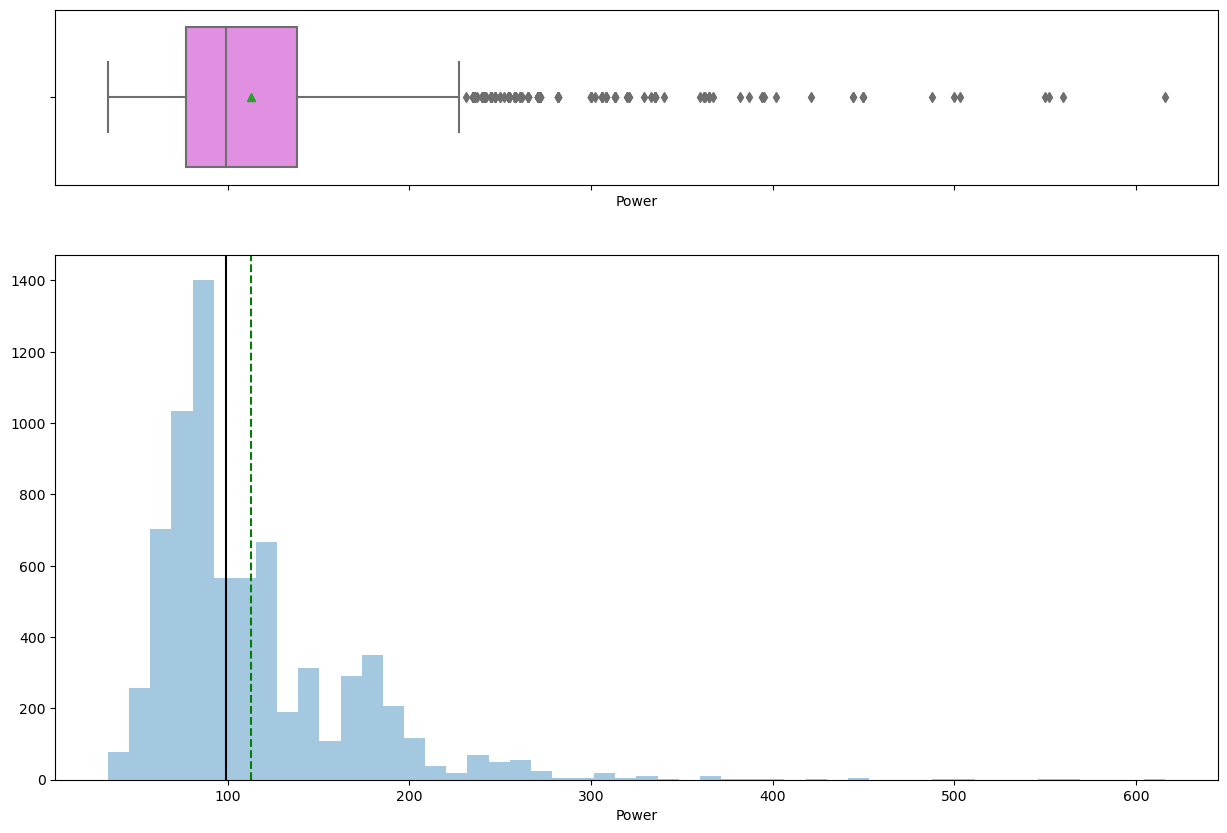

In [21]:
histogram_boxplot(data['Power'])

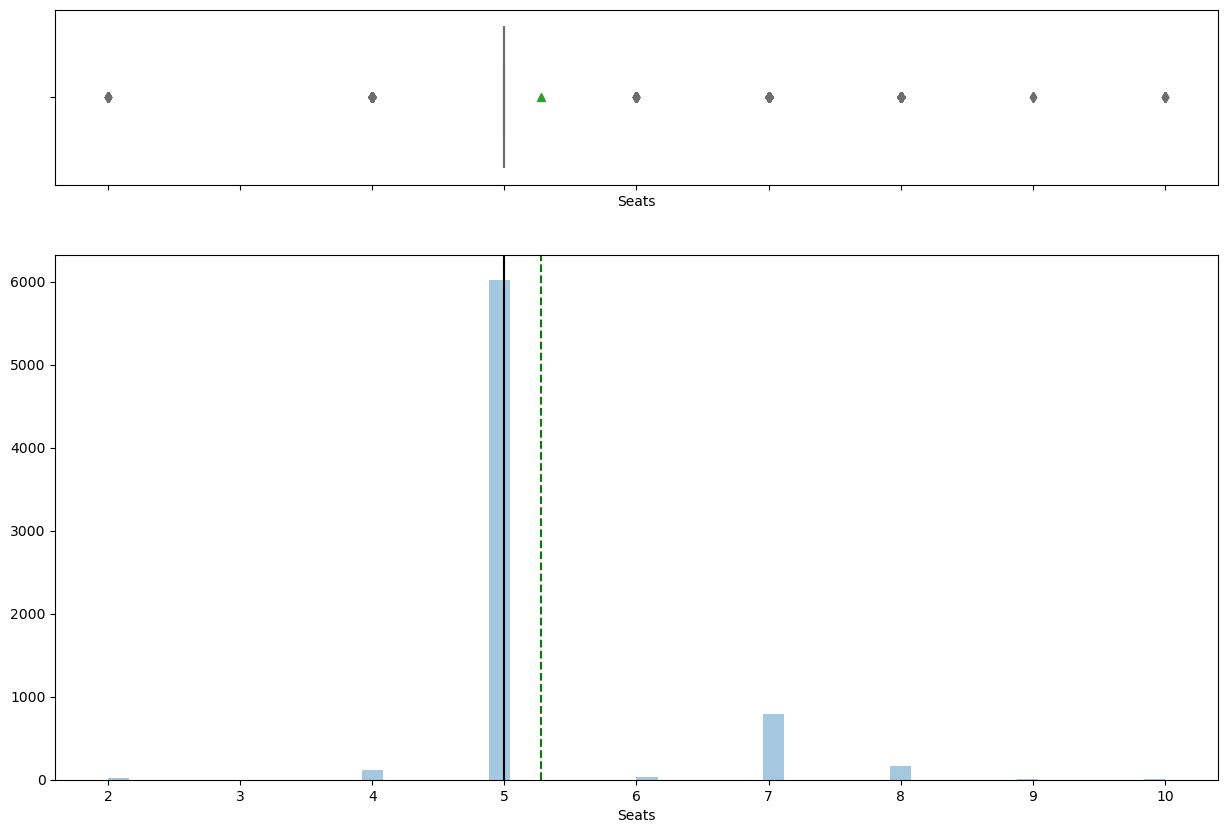

In [22]:
histogram_boxplot(data['Seats'])

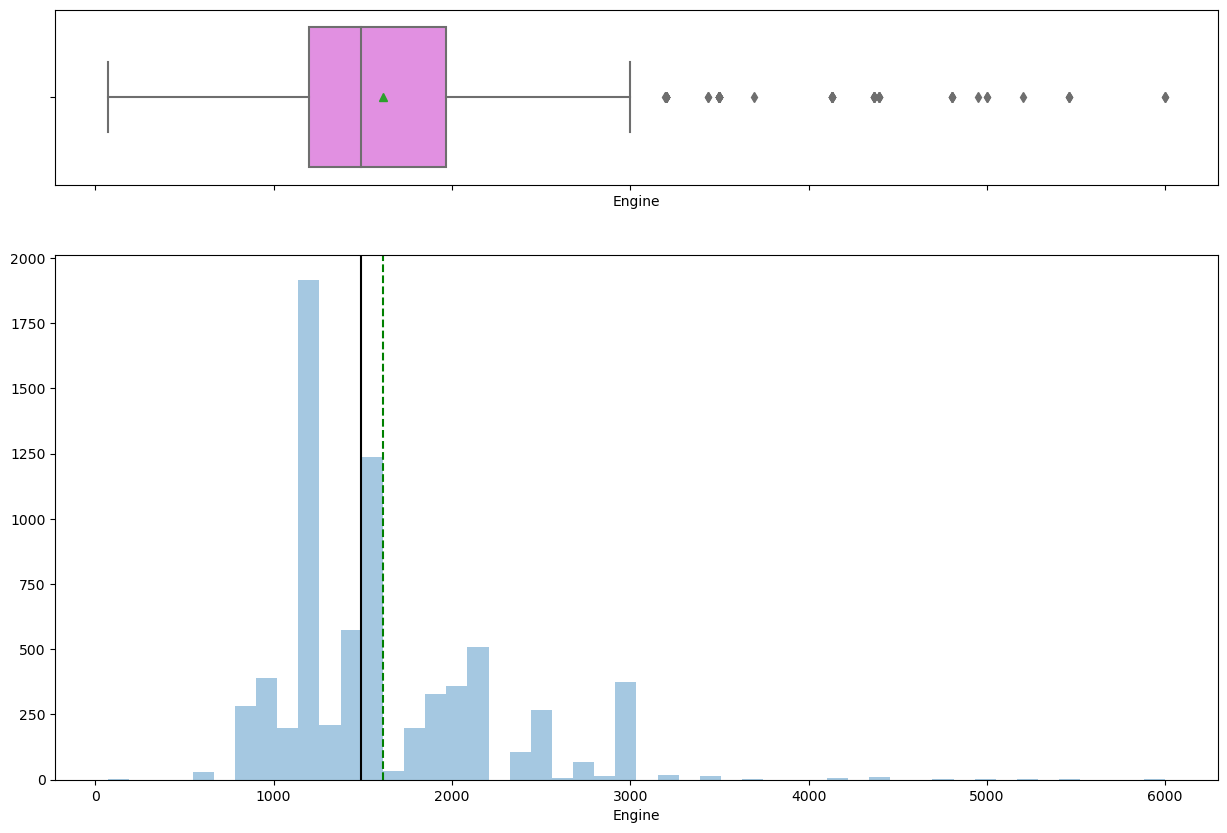

In [23]:
histogram_boxplot(data['Engine'])

**Observations and Insights for all the plots:**<br>
-Year is skewed to the left, as the model year of the cars are all fairly new (within the last 12 years).<br>
-Mileage has a fairly normal distribution.<br>
-Power is skewed to the right, as most of the vehicles have between 100 and 300.<br>
-Seats are fairly evenly distributed, with most of the seats for vehicles being 5.<br>
-Engine is skewed to the right, as most of the vehicles are between 1,000 and 3,000.


## **2. Univariate analysis - Categorical Data**

In [24]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # Length of the column
    
    plt.figure(figsize = (15, 5))
    
    ax = sns.countplot(data[z], palette = 'Paired', order = data[z].value_counts().index)
    
    for p in ax.patches:
        
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class of the category
        
        x = p.get_x() + p.get_width() / 2 - 0.05 # Width of the plot
        
        y = p.get_y() + p.get_height()           # Hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # Annotate the percantage 
    
    plt.show() # Show the plot

**Let us plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.**

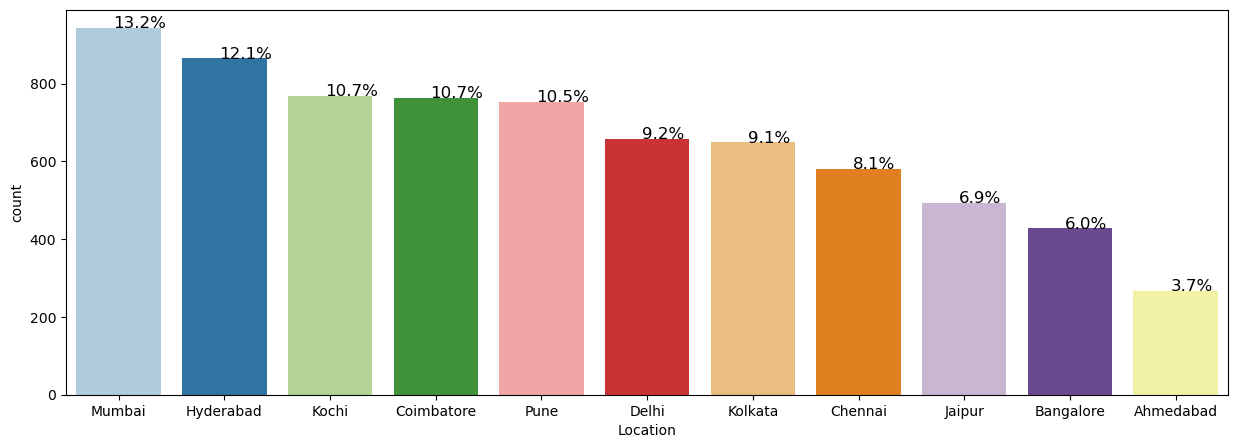

In [25]:
# Bar Plot for 'Location'
perc_on_bar('Location')

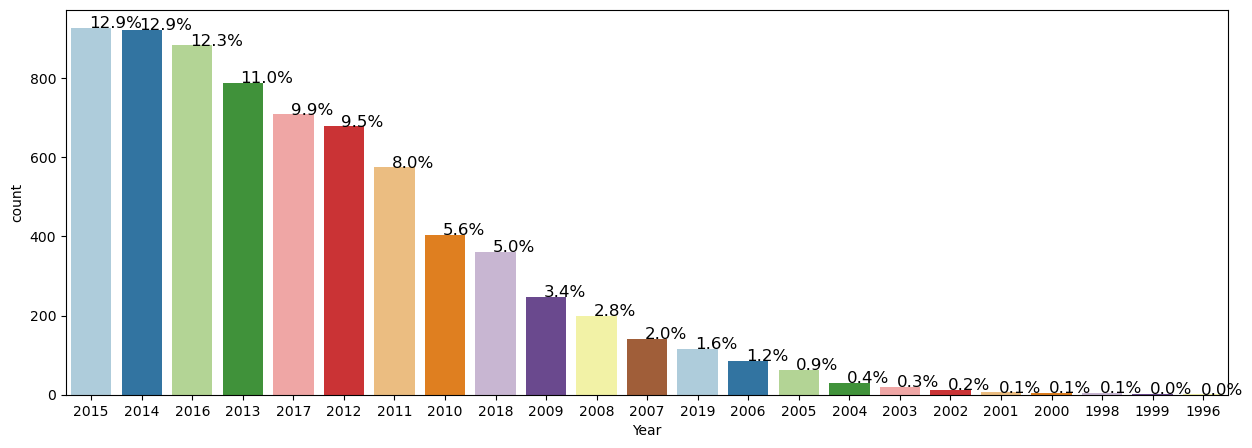

In [26]:
perc_on_bar('Year')

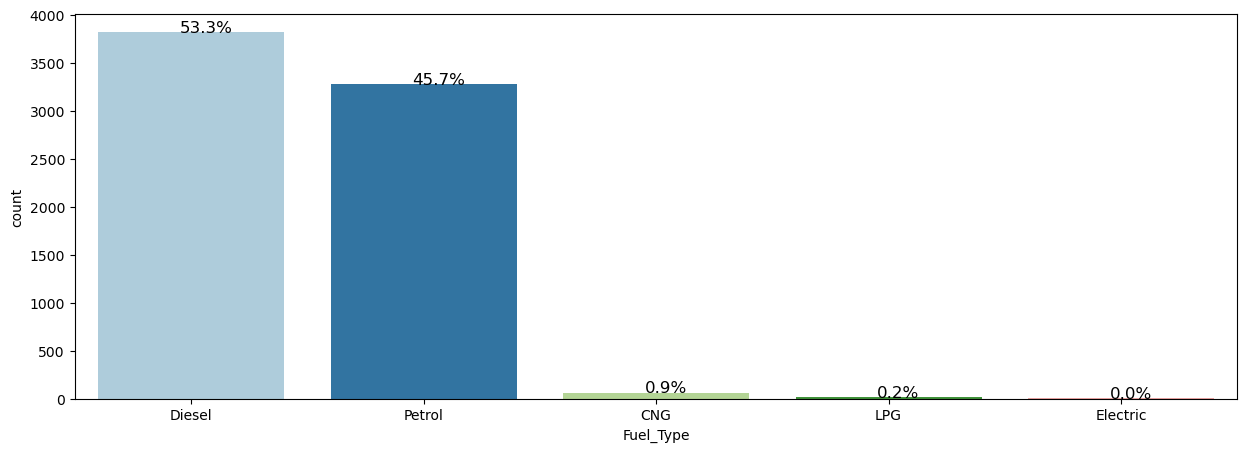

In [27]:
perc_on_bar('Fuel_Type')

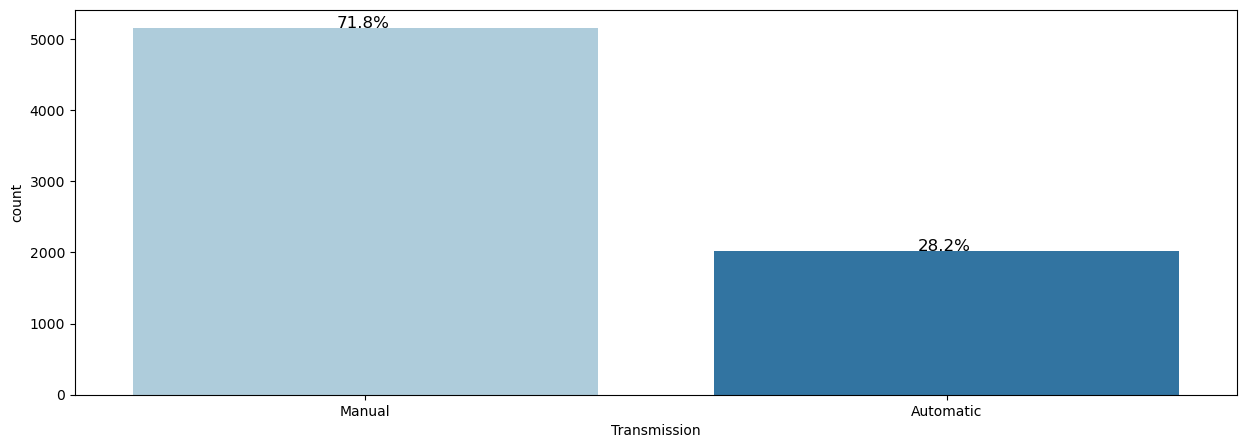

In [28]:
perc_on_bar('Transmission')

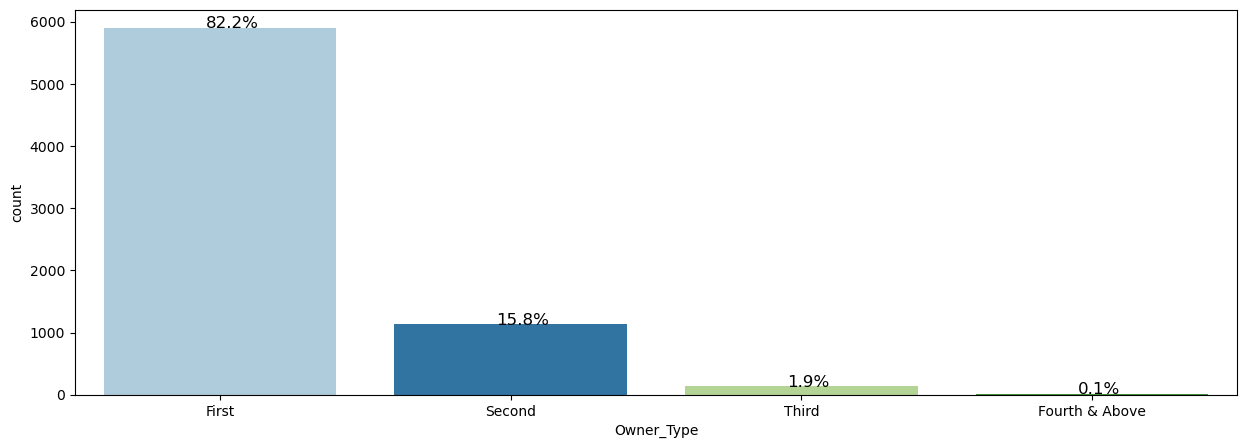

In [29]:
perc_on_bar('Owner_Type')

**Observations and Insights from all plots:**<br>
-We now know that most of the cars are from Mumbai, coming in at 13.1%. The least amount of cars are from Ahmedabad, coming in at 3.8%.<br>
-Many of the cars were built within the last 13 years, with 2015, 2014, 2013, 2017, 2012, and 2011 making 76% of the model years.<br>
-53.1% of the cars take Diesel, while 45.8% take petrol. The remaining 0.5% is between CNG, LPG, and Electric.<br>
-71.8% of the vehicles are manual transmission, while 28.2% are automatic transmission.<br>
-82.1% are first owner, 15.9% are second, 1.9% are third, and 0.2% are fourth and above.

## **Bivariate Analysis**

### **1. Scatter plot**
A scatter plot allows us to see relationships between two variables. 

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

<AxesSubplot:xlabel='Price_log'>

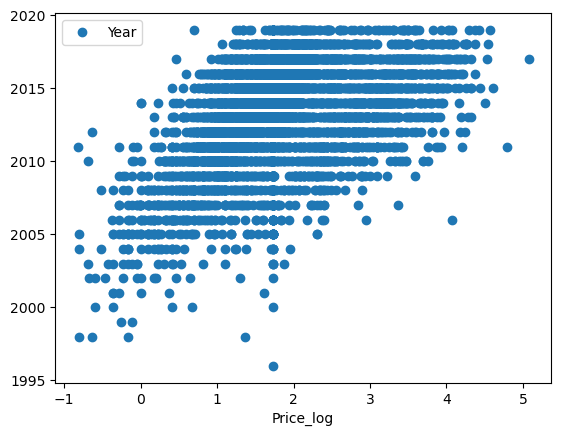

In [30]:
# Let us plot pair plot for the variables 'year' and 'price_log'
data.plot(x = 'Price_log', y = 'Year', style = 'o')

<AxesSubplot:xlabel='Price_log'>

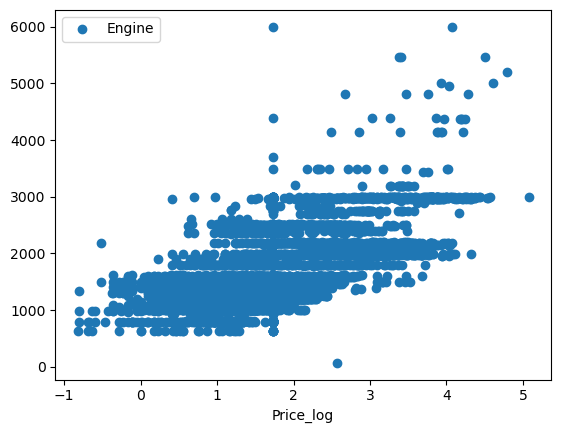

In [31]:
data.plot(x = 'Price_log', y = 'Engine', style = 'o')

<AxesSubplot:xlabel='Price_log'>

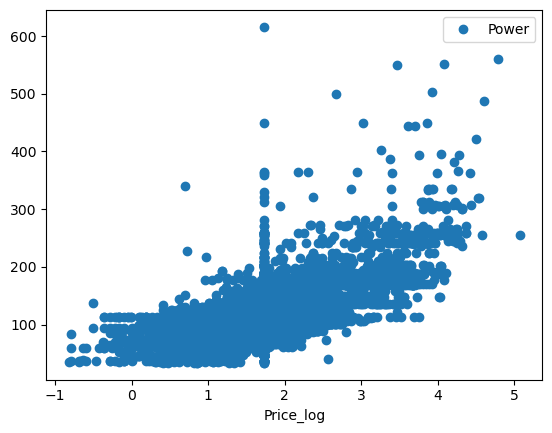

In [32]:
data.plot(x = 'Price_log', y = 'Power', style = 'o')

<AxesSubplot:xlabel='Price_log'>

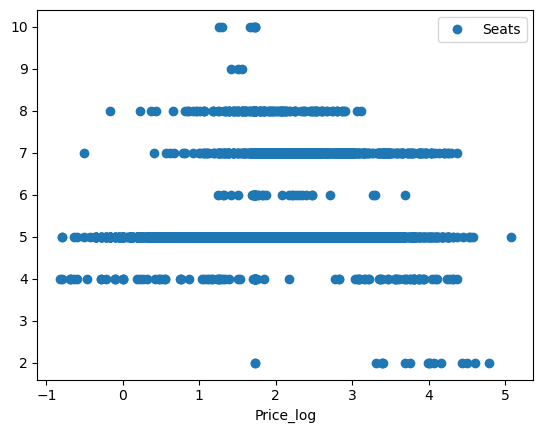

In [33]:
data.plot(x = 'Price_log', y = 'Seats', style = 'o')

<AxesSubplot:xlabel='Price_log'>

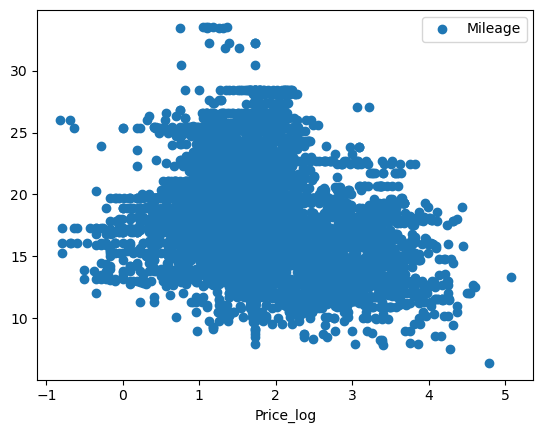

In [34]:
data.plot(x = 'Price_log', y = 'Mileage', style = 'o')

<AxesSubplot:xlabel='Price_log'>

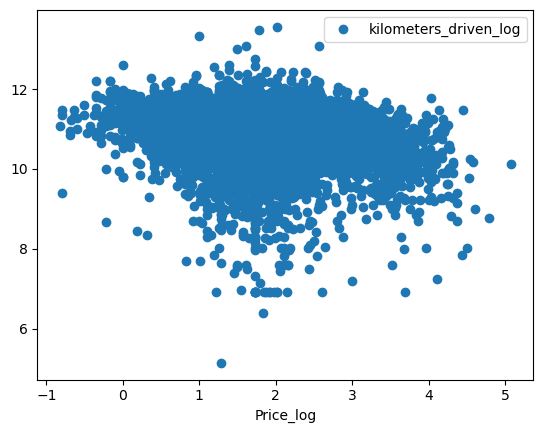

In [35]:
data.plot(x = 'Price_log', y = 'kilometers_driven_log', style = 'o')

**Observations and Insights from all plots:**<br>
-The ones that showed the most promise were price_log and power & price_log and engine.<br>
-The others seemed to have minimal correlation.


### **2. Heat map**
Heat map shows a 2D correlation matrix between two numerical features.

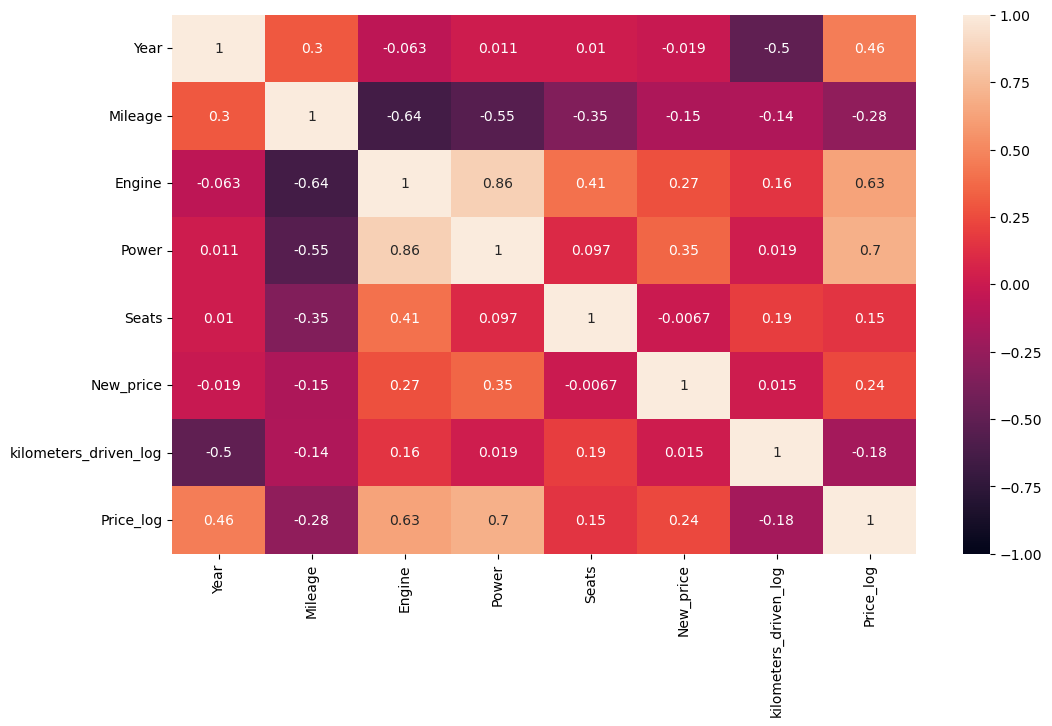

In [36]:
# We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize = (12, 7))

sns.heatmap(data.drop(['Kilometers_Driven','Price'],axis = 1).corr(), annot = True, vmin = -1, vmax = 1)

plt.show()

**Observations and Insights:**<br>
-The highest correlations are: Power & Engine (0.86), and Power & Price_log (0.7).

### **3. Box plot**

In [37]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    
    plt.figure(figsize = (12, 5)) # Setting size of boxplot
    
    sns.boxplot(x = z, y = data['Price']) # Defining x and y
    
    plt.show()
    
    plt.figure(figsize = (12, 5))
    
    plt.title('Without Outliers')
    
    sns.boxplot(x = z, y = data['Price'], showfliers = False) # Turning off the outliers
    
    plt.show()

#### Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

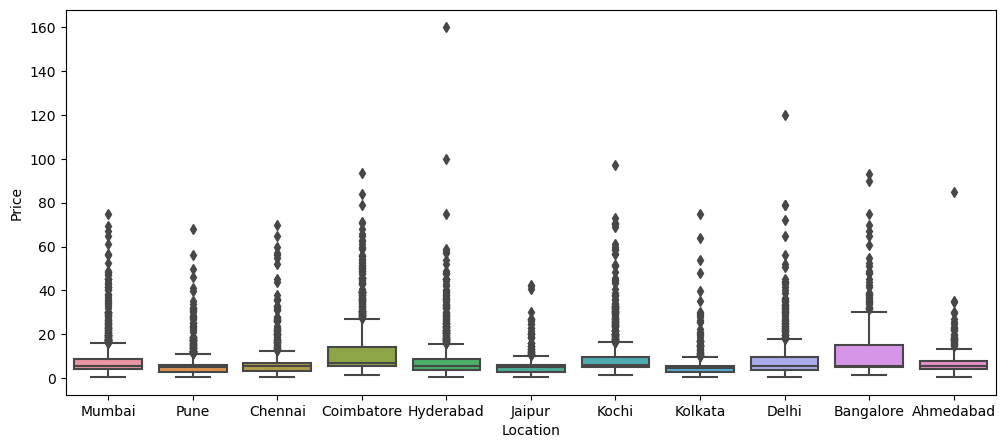

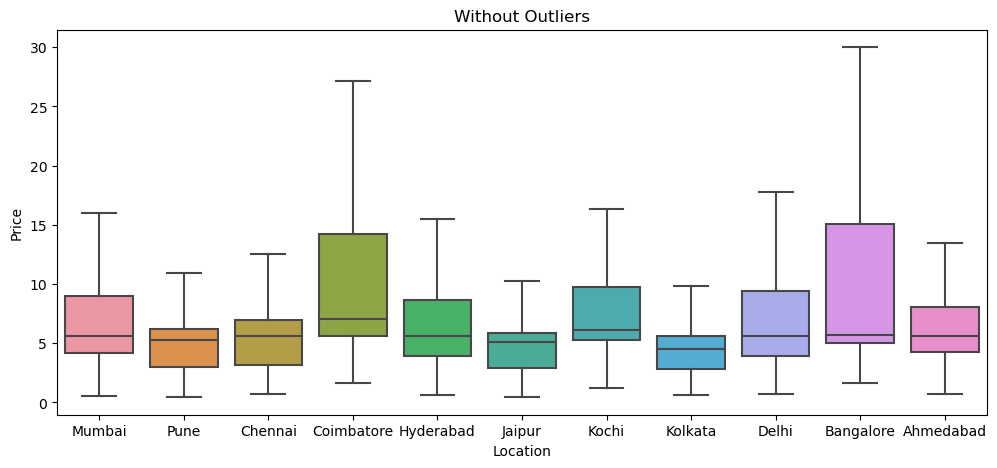

In [38]:
# Box Plot: Price vs Location
boxplot(data['Location'])

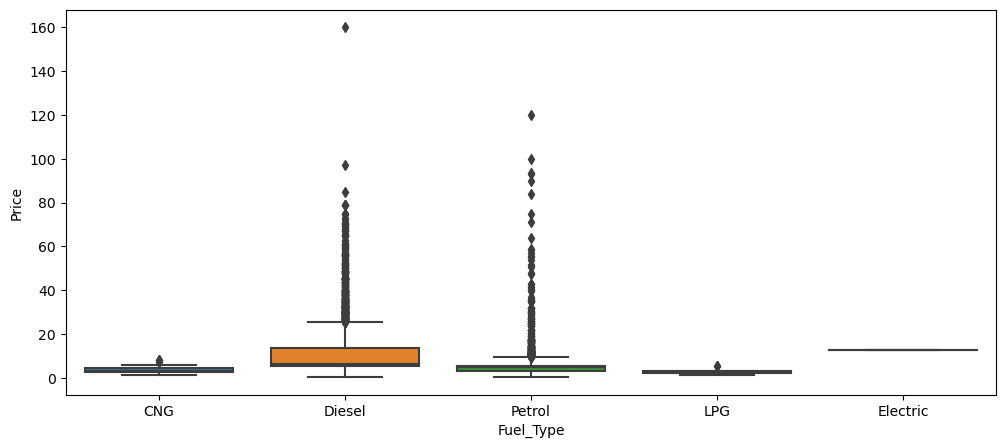

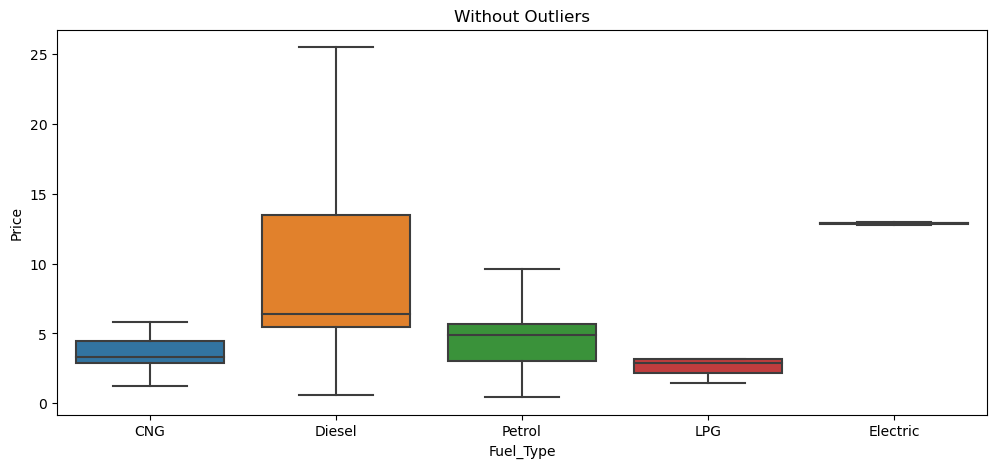

In [39]:
boxplot(data['Fuel_Type'])

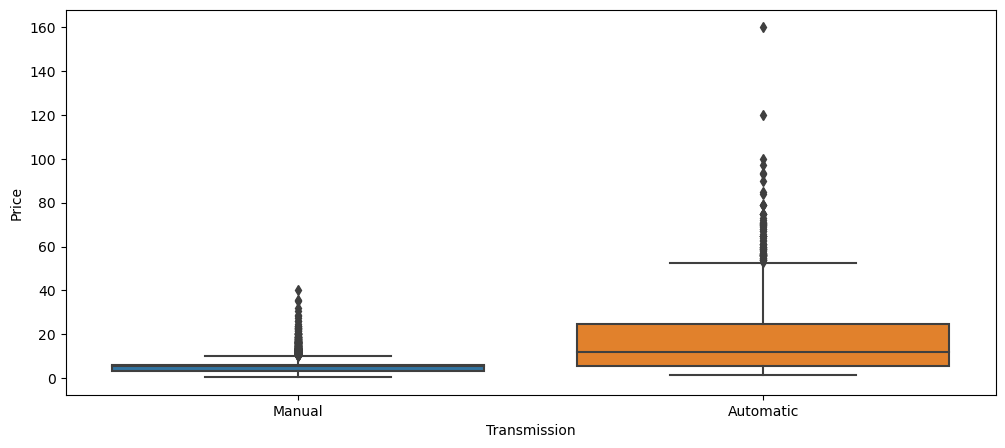

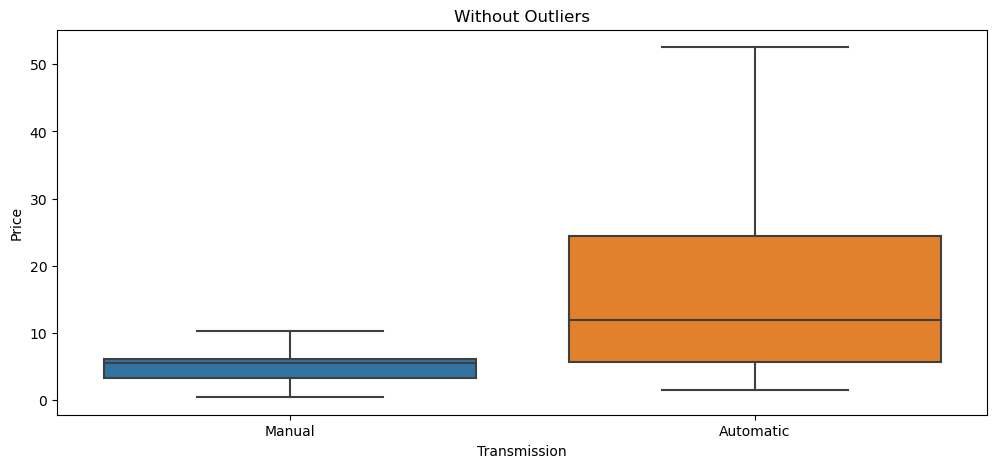

In [40]:
boxplot(data['Transmission'])

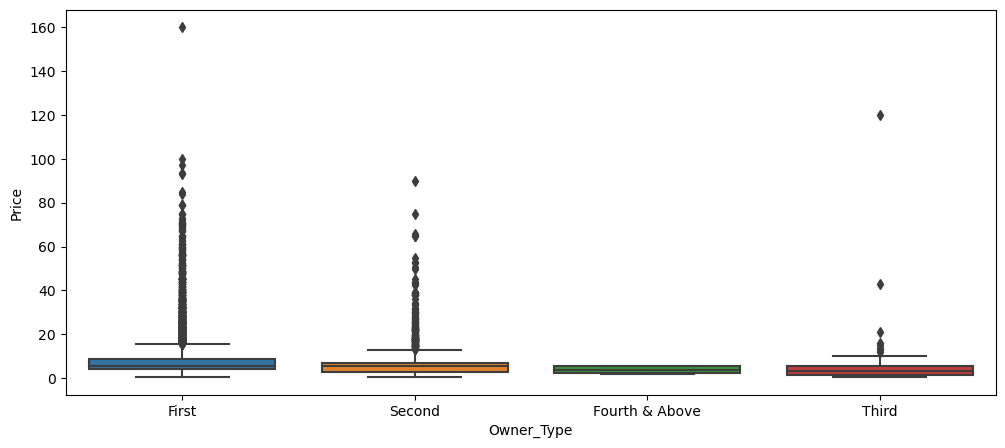

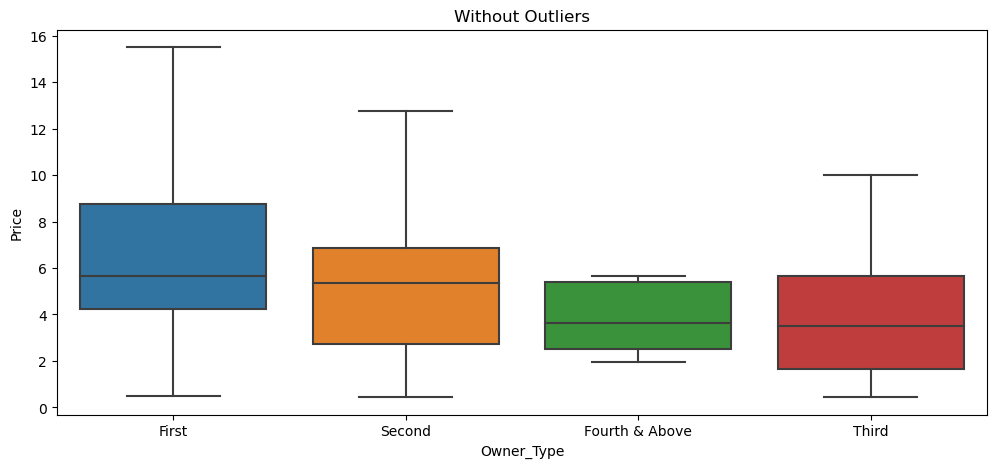

In [41]:
boxplot(data['Owner_Type'])

**Observations and Insights for all plots:**<br>
-The priciest cars are from Coimbatore and bangalore.<br>
-Diesel cars are the most expensive.<br>
-Automatic cars are more expensive.<br>
-First owner cars are more expensive.


### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

In [42]:
data["Name"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7171 entries, 0 to 7170
Series name: Name
Non-Null Count  Dtype 
--------------  ----- 
7171 non-null   object
dtypes: object(1)
memory usage: 56.1+ KB


* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [43]:
# Split the "Name" column by space
df = data

df[['Brand', 'Model']] = df['Name'].str.split(' ', 1, expand=True)

# Print the new columns
print(df[['Name', 'Brand', 'Model']].head())

                               Name    Brand                       Model
0            Maruti Wagon R LXI CNG   Maruti             Wagon R LXI CNG
1  Hyundai Creta 1.6 CRDi SX Option  Hyundai    Creta 1.6 CRDi SX Option
2                      Honda Jazz V    Honda                      Jazz V
3                 Maruti Ertiga VDI   Maruti                  Ertiga VDI
4   Audi A4 New 2.0 TDI Multitronic     Audi  A4 New 2.0 TDI Multitronic


In [44]:
# Insert the new columns at specific index (e.g., after the "Name" column)
df.insert(loc=2, column='Brand', value=df.pop('Brand'))
df.insert(loc=3, column='Model', value=df.pop('Model'))
# Print the new columns
print(df[['Name', 'Brand', 'Model']].head())

                               Name    Brand                       Model
0            Maruti Wagon R LXI CNG   Maruti             Wagon R LXI CNG
1  Hyundai Creta 1.6 CRDi SX Option  Hyundai    Creta 1.6 CRDi SX Option
2                      Honda Jazz V    Honda                      Jazz V
3                 Maruti Ertiga VDI   Maruti                  Ertiga VDI
4   Audi A4 New 2.0 TDI Multitronic     Audi  A4 New 2.0 TDI Multitronic


### **Missing value treatment**

In [45]:
# Now check the missing values of each column. Hint: Use isnull() method
data.isnull()

,Name,Location,Brand,Model,Fuel_Type,Transmission,Owner_Type,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,New_price,kilometers_driven_log,Price_log
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7166,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7167,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7168,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7169,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


There are no more missing values

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

## **Building Various Models**

1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Think about it:** Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

In [46]:

# Define X and y
X = df.drop(['Price_log', 'Seats'], axis=1)
y = df['Price_log']

# Replace missing values with median
X = X.fillna(X.median())

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred, squared=False))

# Ridge Regression
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)
print("Ridge Regression RMSE:", mean_squared_error(y_test, y_pred, squared=False))

# Lasso Regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_test)
print("Lasso Regression RMSE:", mean_squared_error(y_test, y_pred, squared=False))

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)
print("Random Forest Regression RMSE:", mean_squared_error(y_test, y_pred, squared=False))

# Decision Tree Regression
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred = dt_reg.predict(X_test)
print("Decision Tree Regression RMSE:", mean_squared_error(y_test, y_pred, squared=False))

Linear Regression RMSE: 2566722.482802055
Ridge Regression RMSE: 0.2868043742089484
Lasso Regression RMSE: 0.343870301766816
Random Forest Regression RMSE: 0.013745314419340824
Decision Tree Regression RMSE: 0.013692195461523556


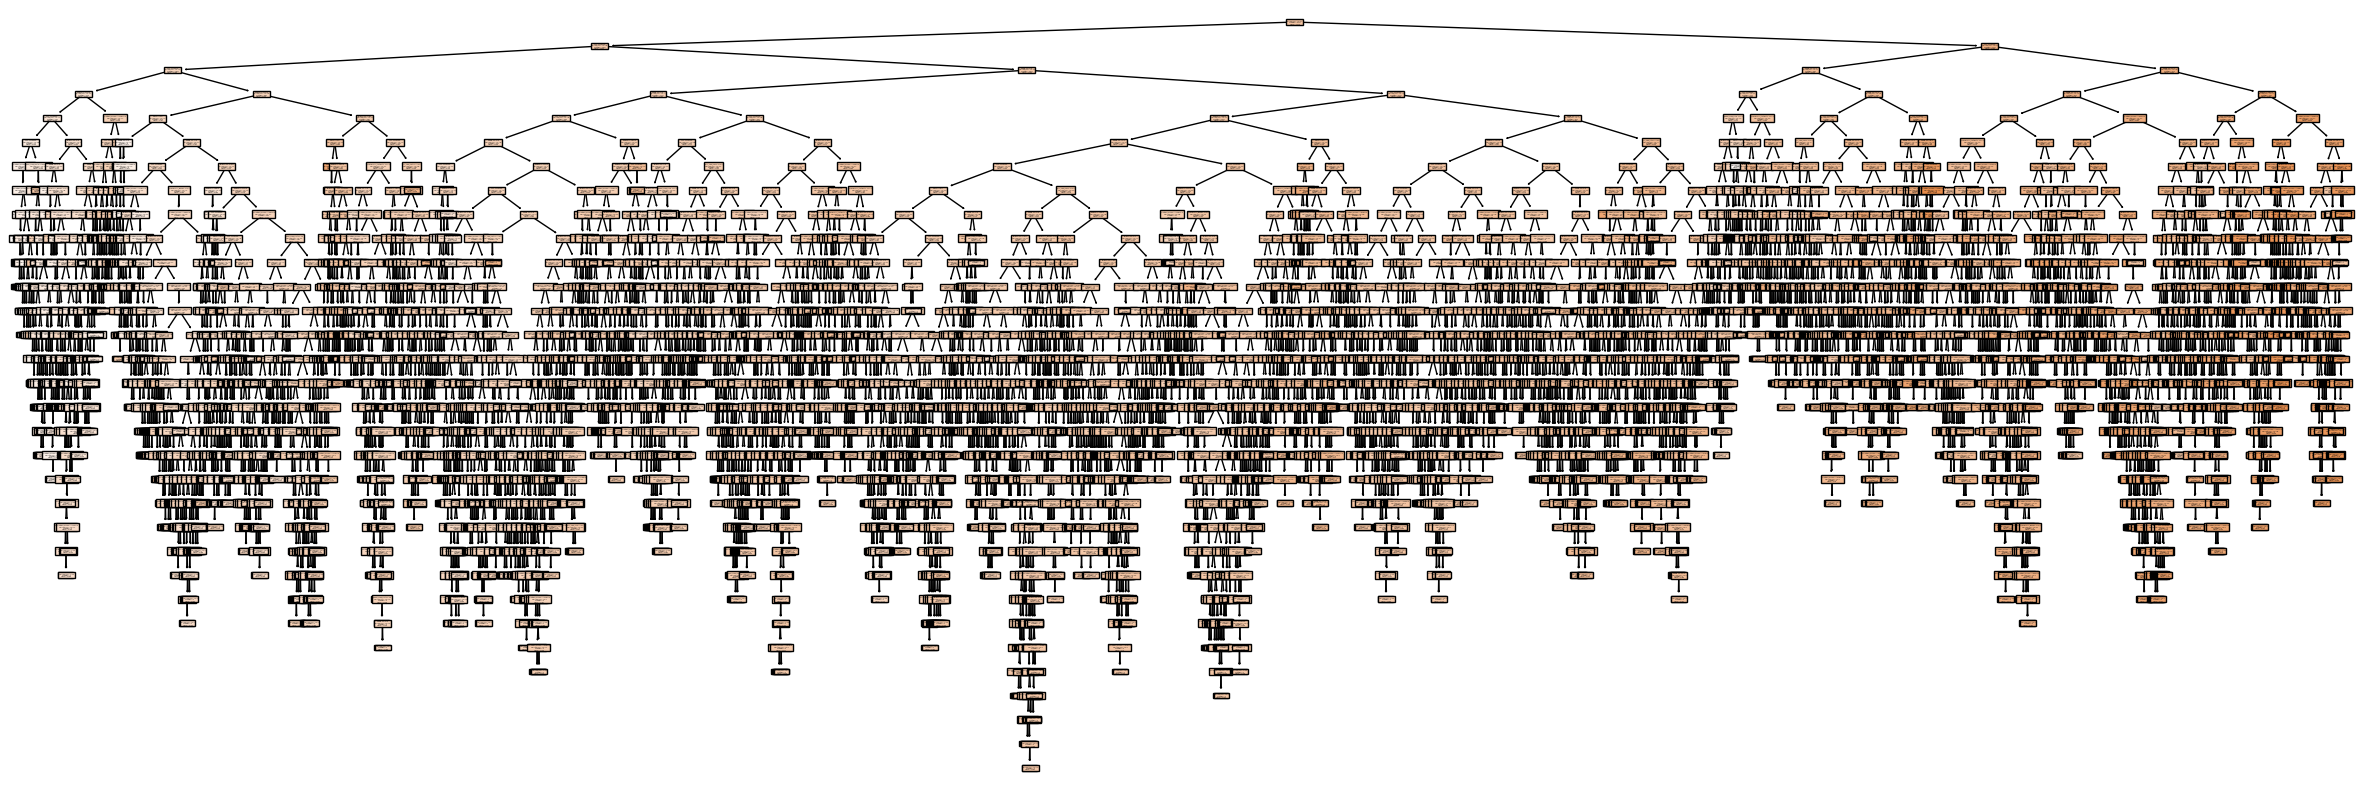

Year: 0.21726682793857582
Kilometers_Driven: 0.10038304220036878
Mileage: 0.0527677097193626
Engine: 0.056674255949443586
Power: 0.5346446837415872
Seats: 0.010412300548746724
Fuel_Type_CNG: 0.000289509139386992
Fuel_Type_Diesel: 0.006222678547486064
Fuel_Type_Electric: 0.0009204140280773134
Fuel_Type_LPG: 0.0002512312948301196
Fuel_Type_Petrol: 0.0012443260794958492
Transmission_Automatic: 0.005150280519243377
Transmission_Manual: 0.0022698642235019304
Owner_Type_First: 0.0031306867164254395
Owner_Type_Fourth & Above: 0.0006785505825572353
Owner_Type_Second: 0.0057604837486945094
Owner_Type_Third: 0.0019331550222163971


In [31]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
# Extract relevant features
X = df[['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']]
y = df['Price_log']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree model
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(30,10))
plot_tree(tree, filled=True, feature_names=X.columns)
plt.show()

# Get feature importances
importances = tree.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

In [32]:
# Get feature importances
importances = tree.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Select the top k most important features
k = 5
top_k_indices = indices[:k]

# Get the names of the top k most important features
top_k_features = [X.columns[i] for i in top_k_indices]

# Create a new dataset with only the top k most important features
X_new = X[top_k_features]

# Split the new dataset into training and testing sets
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Train a new decision tree model on the new dataset
dt_new = DecisionTreeRegressor(random_state=42)
dt_new.fit(X_train_new, y_train)

# Evaluate the new model on the testing set
y_pred_new = dt_new.predict(X_test_new)
mse_new = mean_squared_error(y_test, y_pred_new)
rmse_new = np.sqrt(mse_new)
print("RMSE with top k features:", rmse_new)

RMSE with top k features: 0.5224152322582551


In [37]:
# Create a new dataset with only the most important variables
X_new = X[['Power', 'Year', 'Kilometers_Driven', 'Engine', 'Mileage']]
y_new = y

# Split the dataset into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Train a regression model on the training set
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train_new, y_train_new)

# Evaluate the performance of the model on the testing set
y_pred_new = regressor.predict(X_test_new)
rmse_new = mean_squared_error(y_test_new, y_pred_new, squared=False)
print(f"RMSE with the most important variables: {rmse_new}")

# Use the trained model to predict the prices of new used cars
new_car = pd.DataFrame({'Power': [150], 'Year': [2015], 'Kilometers_Driven': [50000], 'Engine': [2000], 'Mileage': [15]})
price_pred = regressor.predict(new_car)
print(f"Predicted price for the new car: {price_pred[0]}")

RMSE with the most important variables: 0.41669556225874715
Predicted price for the new car: 2.2990726002732695


In [38]:
from sklearn.ensemble import RandomForestRegressor

# Extract relevant features
X = df[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']]
y = df['Price_log']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

Year: 0.22195483030437568
Kilometers_Driven: 0.10840180717593363
Mileage: 0.0579734106701974
Engine: 0.06665217762970793
Power: 0.5450177742197855


In [40]:
# Extract relevant features
X = df[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']]
y = df['Price_log']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

# Fit a new random forest model using only the most important features
important_features = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']
X_train_imp = X_train[important_features]
X_test_imp = X_test[important_features]
rf_imp = RandomForestRegressor(random_state=42)
rf_imp.fit(X_train_imp, y_train)

# Get feature importances from the new model
importances_imp = rf_imp.feature_importances_

# Print feature importances from the new model
for feature, importance in zip(important_features, importances_imp):
    print(f"{feature}: {importance}")

# Use the feature importances to create a pricing model
coef_dict = {}
for feature, importance in zip(important_features, importances_imp):
    coef_dict[feature] = importance

def predict_price(year, kilometers_driven, mileage, engine, power):
    return (coef_dict['Year']*year
            + coef_dict['Kilometers_Driven']*kilometers_driven
            + coef_dict['Mileage']*mileage
            + coef_dict['Engine']*engine
            + coef_dict['Power']*power)

# Example usage of the pricing model
predicted_price = predict_price(year=2015, kilometers_driven=50000, mileage=18, engine=1197, power=80)
print(predicted_price)

Year: 0.22195483030437568
Kilometers_Driven: 0.10840180717593363
Mileage: 0.0579734106701974
Engine: 0.06665217762970793
Power: 0.5450177742197855
Year: 0.22195483030437568
Kilometers_Driven: 0.10840180717593363
Mileage: 0.0579734106701974
Engine: 0.06665217762970793
Power: 0.5450177742197855
5991.756941812406


## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

The Decision Tree model works best. As you can see, the Decision Tree model has the lowest Root Means Squared Error (RMSE), meaning it is the most accurate. For creating the best used car price, using the Decision Tree model is best.

**2. Refined insights:** 
- What are the most meaningful insights relevant to the problem?

The price was incredibly skewed. Using the different variables allowed me to create the most accurate, trained pricing model

**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt? What are expected benefits and costs (assume numbers) of this solution design?

The model I propose we use is the Decision Tree model. This is the best solution because it is the least time intensive, most cost effective, and most accurate of the predictive models. The cost will be the time cost (minutes), the internet cost (to run the regression) as well as the electricity. The benefits will be having an accurate used car price, predicted by most of the aspects of the specific car.